<center><img src=img/MScAI_brand.png width=70%></center>

# Scikit-Learn: Introduction

<img src=img/sklearn-logo.png width=20%> 

Scikit-Learn provides a wide variety of machine learning algorithms and utilities with a nice uniform interface.

* Home page https://scikit-learn.org/stable/
* User guide (recommended) https://scikit-learn.org/stable/user_guide.html

A useful resource is the Vanderplas *Python Data Science Handbook* 
https://jakevdp.github.io/PythonDataScienceHandbook/ and we will draw on this, referring to it as *PDSH*.

We'll start with **supervised learning**.

Vanderplas (PDSH) describes the core workflow for supervised learning in Scikit-Learn as: "import/instantiate/fit/predict", but I will add another step:

* import
* instantiate
* fit
* **evaluate**
* predict

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/mpg.csv")
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let's suppose we want to model the `mpg` feature. This is regression.

In [22]:
y = df["mpg"].values # convert to np

Let's suppose we only think two features are relevant: `weight` and `model_year`.

In [23]:
X = df[["model_year", "weight"]].values # convert to np

* Notice a convention for uppercase `X` (multiple variables) and lowercase `y` (a single variable)

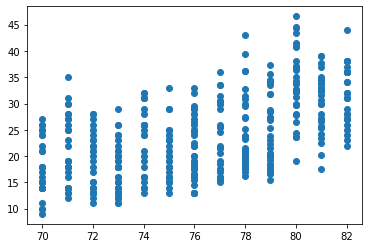

In [24]:
plt.scatter(X[:, 0], y);

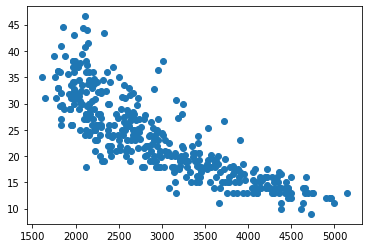

In [25]:
plt.scatter(X[:, 1], y);

Now, when doing ML with "tabular" data, in our independent variables we have `n_samples` (number of rows in an Excel file) and `n_variables` (number of columns). Will our `X` be `(n_samples, n_variables)` or `(n_variables, n_samples)`?

Either would work fine, but the Scikit-Learn authors had to choose, and they chose `(n_samples, n_variables)`.

* Independent variables `X`: array of shape `(n_samples, n_variables)` 
* Even if `n_variables == 1`, it's still `(n_samples, 1)`, not `(n_samples,)`.
* If you have `(n_variables, n_samples)`, just **transpose**.
* Our dependent variable is typically of shape `(n_samples,)`.

In [26]:
X.shape, y.shape 

((398, 2), (398,))

### Make a train-test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

* Notice the order of the result -- very hard to remember!

### Import

In [28]:
from sklearn.linear_model import LinearRegression

### Instantiate

In [29]:
lr = LinearRegression()

### Fit

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate


In [31]:
lr.score(X_test, y_test)

0.8006336135660204

The result is an $R^2$ value, i.e. a coefficient of determination. Higher is better.

### Predict 

For an unknown `X`:

In [32]:
X_query = np.array([[83., 4000.0]]) # a car with year = 83, weight = 4000kg (shape = (1, 2)) 
fX_query = lr.predict(X_query) 
fX_query # prediction for mpg

array([21.92645693])

Notice the result is of shape `(1,)`.

### Inspecting and understanding the model

Look at the fitted parameters $a$ and $b_i$ (for $i \in $ `(0, n_vars-1)`).

In [33]:
a = lr.intercept_
B = lr.coef_
a, B  

(-14.876573643225043, array([ 0.75878746, -0.00654408]))

This tells us that each extra year is associated with an increase of 0.8 in the miles per gallon; while each extra kg reduces the mpg by a small fraction, approximately 0.007.

### Visualise 

We'll look at our test data, newly-fitted model, and the query point.

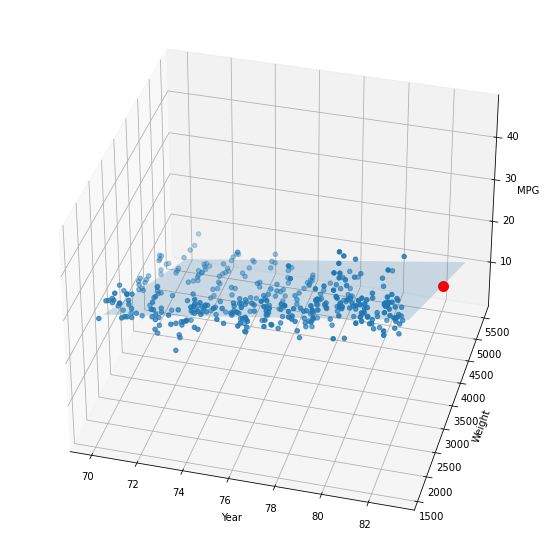

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Year')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG');

# plot the data (small blue circles) and our prediction for a specific point (large red)
ax.scatter(X[:, 0], X[:, 1], y) 
ax.scatter(X_query[:, 0], X_query[:, 1], fX_query, s=100, c="red")

# plot the plane representing the LR model
X0_grid = np.linspace(70, 83, 14)
X1_grid = np.linspace(2000, 5500, 36)
xx, yy = np.meshgrid(X0_grid, X1_grid)
z = a + B[0] * xx + B[1] * yy
ax.plot_surface(xx, yy, z, alpha=0.2) 

# set the viewing angle - tricky
ax.view_init(elev=35., azim=-75);
plt.savefig("img/mpg_plot_3d.png")

![](img/mpg_plot_3d.png)

Observe that this is *extrapolation*, not *interpolation*, i.e. we are trying to predict for a point which is "outside" the observed `X` (not just unseen).

### Summary

* get data
* train-test split
* import
* instantiate
* fit on training data
* look at model parameters
* evaluate on test data
* visualise
* **query on new data**

### Pandas instead of Numpy

We can instead pass in a Pandas `DataFrame` as `X`. In that case other methods like `predict` will also expect a `DataFrame`.

In [15]:
import pandas as pd
df = pd.read_csv("data/mpg_extract.csv", 
                 names=["year", "mpg"], skiprows=1)
X = df[["year"]]
y = df[["mpg"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)
lr.predict(pd.DataFrame({"year": [85]})) # wrap our X in a DataFrame

array([[35.04422413]])